# **Importing Libraries + Paths**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, average_precision_score, roc_curve, recall_score, precision_score, f1_score,classification_report
import matplotlib.pyplot as plt
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, HalvingRandomSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint, loguniform, lognorm
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import uniform, randint
!pip install keras-tuner
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from kerastuner import HyperModel
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters
from keras_tuner import Objective
#!pip install --upgrade scikit-learn

seed= 35
np.random.seed(seed)

X_train_path = "/content/drive/MyDrive/Thesis_DSS/Features_Labels/X_train.pickle" 
X_test_path = "/content/drive/MyDrive/Thesis_DSS/Features_Labels/X_test.pickle" 
y_train_path = "/content/drive/MyDrive/Thesis_DSS/Features_Labels/y_train.pickle" 
y_test_path = "/content/drive/MyDrive/Thesis_DSS/Features_Labels/y_test.pickle" 
XGBoost_no_sampling_strategy = "/content/drive/MyDrive/Thesis_DSS/Models/Baseline/XGBoost_no_sampling_strategy.pickle"
XGBoost_with_rus = "/content/drive/MyDrive/Thesis_DSS/Models/Baseline/XGBoost_with_rus.pickle" 
XGBoost_with_ros = "/content/drive/MyDrive/Thesis_DSS/Models/Baseline/XGBoost_with_ros.pickle"
XGBoost_with_smote = "/content/drive/MyDrive/Thesis_DSS/Models/Baseline/XGBoost_with_smote.pickle" 
BRNN_with_rus = "/content/drive/MyDrive/Thesis_DSS/Models/BRNN/BRNN_with_rus.h5" 
diff_pairs_srnn = "/content/drive/MyDrive/Thesis_DSS/Models/SRNN/input/diff_pairs.pickle" 
sim_pairs_srnn = "/content/drive/MyDrive/Thesis_DSS/Models/SRNN/input/sim_pairs.pickle"
y_pairs_srnn = "/content/drive/MyDrive/Thesis_DSS/Models/SRNN/input_pairs.pickle"
X_Y_train_pairs = "/content/drive/MyDrive/Thesis_DSS/Models/SRNN/input/train_pairs.pickle"
X_Y_val_pairs =  "/content/drive/MyDrive/Thesis_DSS/Models/SRNN/input/val_pairs.pickle"
test_pairs = "/content/drive/MyDrive/Thesis_DSS/Models/SRNN/input/test_pairs.pickle"
SRNN_with_rus = "/content/drive/MyDrive/Thesis_DSS/Models/SRNN/srnn_rus.h5"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 16.0 MB/s eta 0:00:00


<ipython-input-1-9fe875732002>:24: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading Backorder dataset**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Thesis_DSS/Dataset_thesis_other/Kaggle_Training_Dataset_v2.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Thesis_DSS/Dataset_thesis_other/Kaggle_Test_Dataset_v2.csv')

df_test=df_test.drop(df_test.iloc[-1:].index,inplace=False)   #remove last rows because completely empty
df_train=df_train.drop(df_train.iloc[-1:].index,inplace=False) #remove last rows because completely empty

<ipython-input-6-d8fe424c4d3a>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/drive/MyDrive/Thesis_DSS/Dataset_thesis_other/Kaggle_Training_Dataset_v2.csv')
<ipython-input-6-d8fe424c4d3a>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('/content/drive/MyDrive/Thesis_DSS/Dataset_thesis_other/Kaggle_Test_Dataset_v2.csv')


In [ ]:
df_train .shape, df_test.shape #This is an initial split

((1687860, 23), (242075, 23))

# **Sparsity of data**

<Axes: >

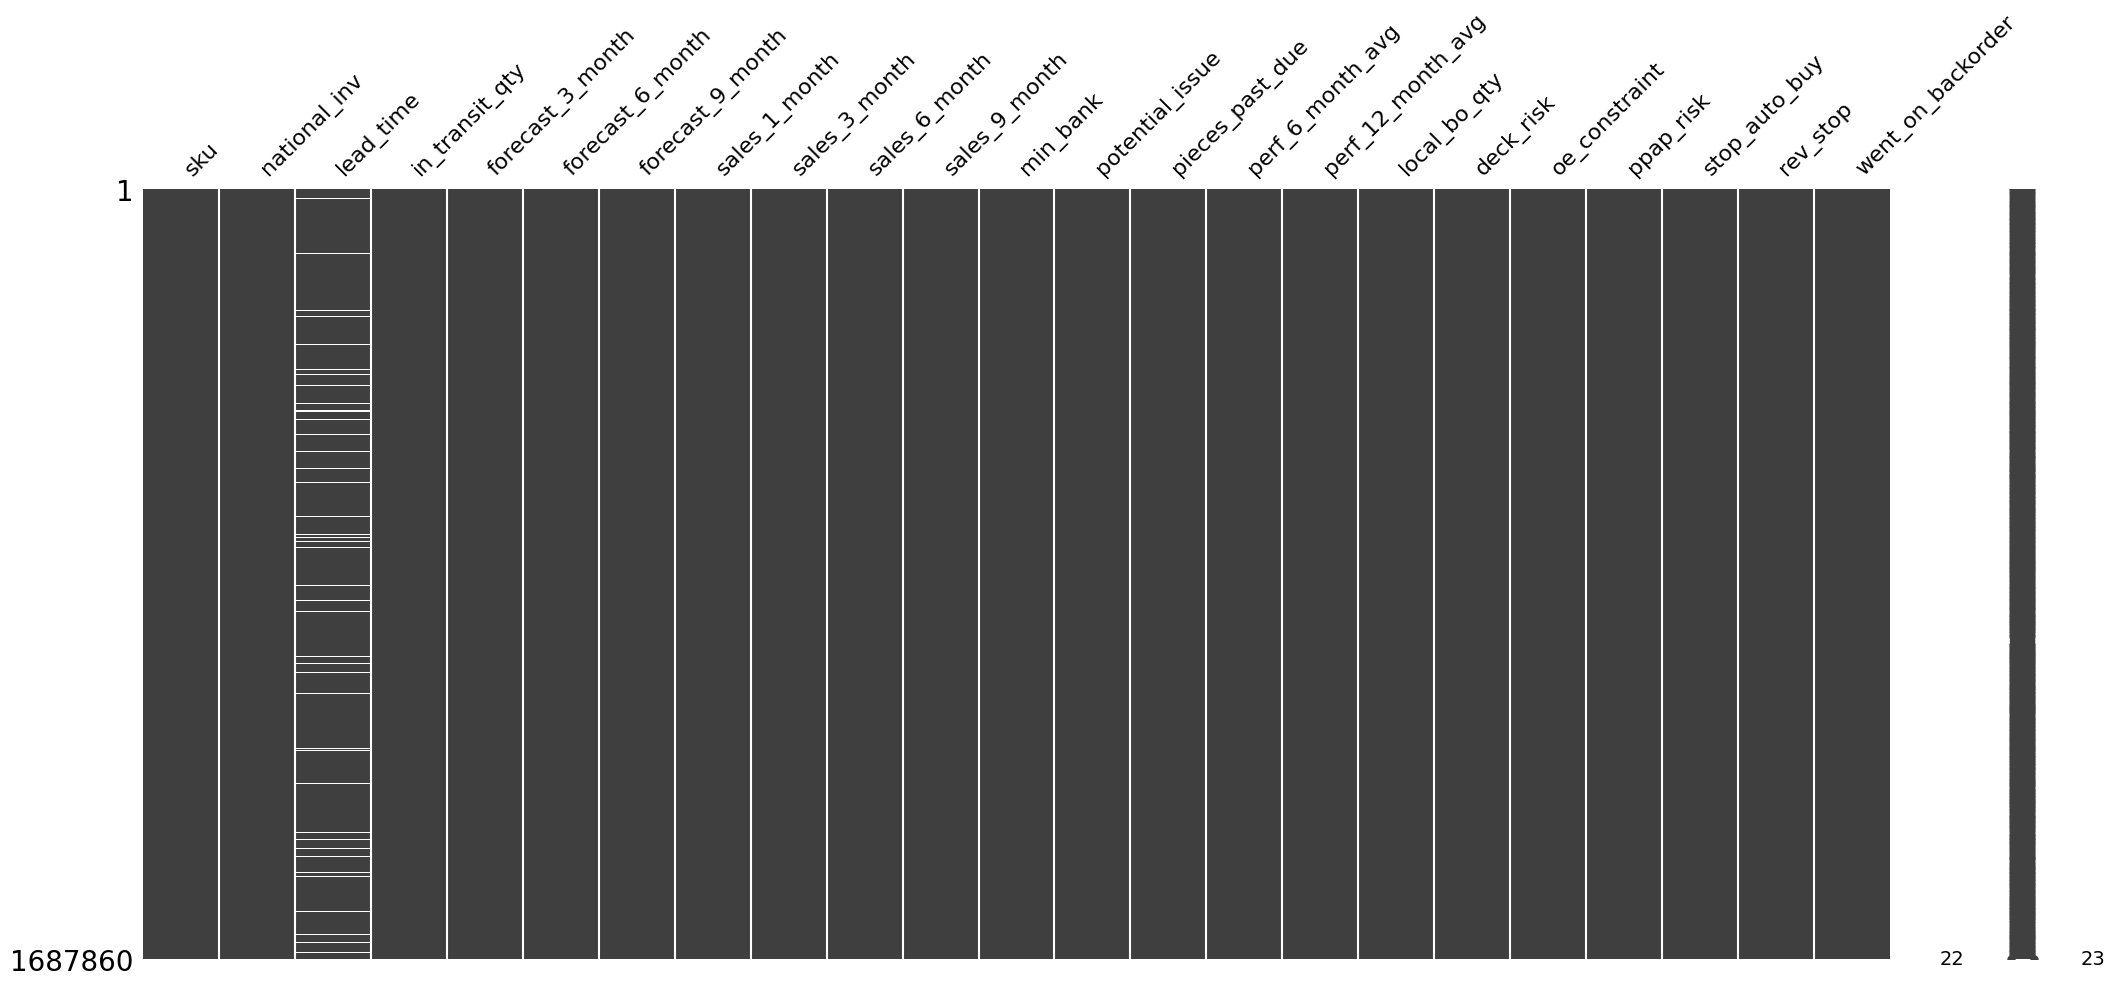

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(df_train)

In [ ]:
# Select numeric columns only
numeric_columns = df_train.select_dtypes(include='number')

# Filter numeric columns with zero values
numeric_columns_with_zero = numeric_columns.loc[(numeric_columns == 0).any(axis=1)]

numeric_columns_with_zero




,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0.0,0.69,0.69,5.0
1687856,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0.0,-99.00,-99.00,1.0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0.0,0.86,0.84,1.0
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0.0,0.86,0.84,6.0


In [ ]:
sparsity= numeric_columns_with_zero.isin([0]).sum()
sparsity= sparsity.sort_values(ascending= False)

<BarContainer object of 15 artists>

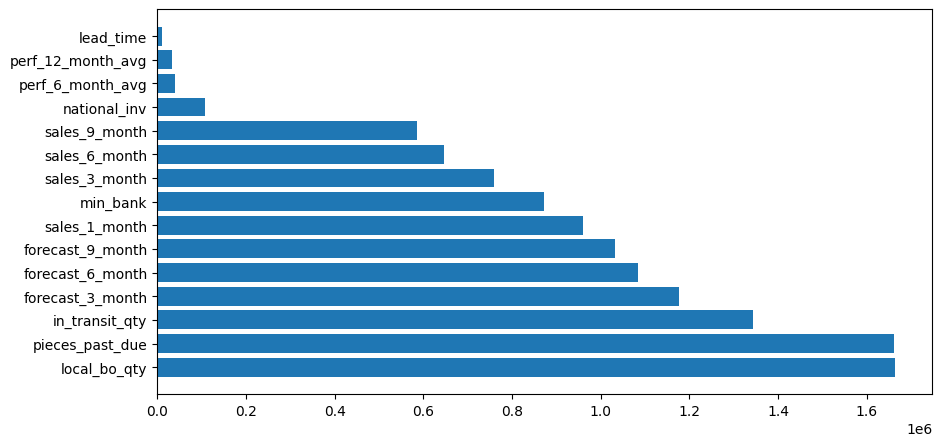

In [ ]:
x, y = zip(*sparsity.items())
plt.figure(figsize=(10, 5))
plt.barh(y = x, width= y)

# **Preprocessing Backorder dataset**

## Missing & illogical values, duplicates

In [ ]:
# Analyzing missing values
def missing_data(rows):
    missing_values = []
    percentage_missing = []
    n_row = rows.shape[0]
    for col in rows.columns:
        missing_values.append(rows[col].isnull().sum())
        percentage_missing.append(missing_values[-1]/n_row*100)
    return pd.DataFrame({'Features':rows.columns, 'Number of missing values':missing_values, 'Percentage Missing':percentage_missing})

print(missing_data(df_train))
print()
print(missing_data(df_test))

             Features  Number of missing values  Percentage Missing
0                 sku                         0            0.000000
1        national_inv                         0            0.000000
2           lead_time                    100893            5.977569
3      in_transit_qty                         0            0.000000
4    forecast_3_month                         0            0.000000
5    forecast_6_month                         0            0.000000
6    forecast_9_month                         0            0.000000
7       sales_1_month                         0            0.000000
8       sales_3_month                         0            0.000000
9       sales_6_month                         0            0.000000
10      sales_9_month                         0            0.000000
11           min_bank                         0            0.000000
12    potential_issue                         0            0.000000
13    pieces_past_due                         0 

In [ ]:
# Import the SimpleImputer class
from sklearn.impute import SimpleImputer

# Create a copy of the dataset to store the imputed values
df_train_imputed = df_train.copy()

# Identify missing values in the 'lead_time' column
missing_values = df_train_imputed['lead_time'].isnull()

# Impute missing values using SimpleImputer with median strategy
imputer = SimpleImputer(strategy='median')
df_train_imputed['lead_time'] = imputer.fit_transform(df_train_imputed[['lead_time']])

#Create a copy of the test dataset to store the imputed values
df_test_imputed = df_test.copy()

# Identify missing values in the 'lead_time' column
missing_values = df_test_imputed['lead_time'].isnull()

# Impute missing values using SimpleImputer with median strategy
df_test_imputed['lead_time'] = imputer.transform(df_test_imputed[['lead_time']])

In [ ]:
#View the values of each column
for a in df_train_imputed.columns:
  print(a)
  print(df_train_imputed[a].value_counts())
  print() #SKU is all unique therefore it functions as a sort of index therefore it wont be useful in model building

sku
1026827    1
1489888    1
1489898    1
1489897    1
1489896    1
          ..
1910576    1
1910575    1
1910574    1
1910573    1
1502009    1
Name: sku, Length: 1687860, dtype: int64

national_inv
 0.0        108425
 2.0        107869
 3.0         90577
 4.0         69588
 5.0         58916
             ...  
 8928.0          1
 14216.0         1
 8153.0          1
 59796.0         1
-208.0           1
Name: national_inv, Length: 14969, dtype: int64

lead_time
8.0     783079
2.0     337402
12.0    199700
4.0     128537
9.0     123649
52.0     30113
3.0      16253
10.0     14192
0.0      10511
14.0     10314
16.0      8843
13.0      5405
6.0       5365
5.0       4031
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
7.0        209
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        28
1.0         21
23.0        14
25.0         7
Name: lead_time, dtype: int64

in_transit_qty
0.0 

In [ ]:
negative_values = df_train_imputed[df_train_imputed['perf_12_month_avg'] < 0]['perf_12_month_avg'].count()
print(negative_values)

122050


In [ ]:
negative_values = df_train_imputed[df_train_imputed['perf_6_month_avg'] < 0]['perf_6_month_avg'].count()
print(negative_values)

129478


In [ ]:
negative_values = df_test_imputed[df_test_imputed['perf_12_month_avg'] < 0]['perf_12_month_avg'].count()
print(negative_values)

17975


In [ ]:
negative_values = df_test_imputed[df_test_imputed['perf_6_month_avg'] < 0]['perf_6_month_avg'].count()
print(negative_values)

19101


In [ ]:
imputer = SimpleImputer(strategy='mean')

# Convert -99 values to NaN in the 'perf_6_month_avg' column
df_train_imputed['perf_6_month_avg'] = df_train_imputed['perf_6_month_avg'].replace(-99, np.nan)

# Impute missing values in the 'perf_6_month_avg' column using SimpleImputer with mean strategy
df_train_imputed['perf_6_month_avg'] = imputer.fit_transform(df_train_imputed[['perf_6_month_avg']])

# Repeat the same steps for the test dataset
df_test_imputed['perf_6_month_avg'] = df_test_imputed['perf_6_month_avg'].replace(-99, np.nan)
df_test_imputed['perf_6_month_avg'] = imputer.transform(df_test_imputed[['perf_6_month_avg']])

# Print the value with which the missing values were imputed
print(imputer.statistics_)


[0.78238119]


In [ ]:
# Convert -99 values to NaN in the 'performance-12-avg' column
df_train_imputed['perf_12_month_avg'] = df_train_imputed['perf_12_month_avg'].replace(-99, np.nan)

# Impute missing values in the 'performance-6-avg' column using SimpleImputer with mean strategy
df_train_imputed['perf_12_month_avg'] = imputer.fit_transform(df_train_imputed[['perf_12_month_avg']])

# Repeat the same steps for the test dataset
df_test_imputed['perf_12_month_avg'] = df_test_imputed['perf_12_month_avg'].replace(-99, np.nan)
df_test_imputed['perf_12_month_avg'] = imputer.transform(df_test_imputed[['perf_12_month_avg']])
print(imputer.statistics_)

[0.77697627]


In [ ]:
# Convert categorical variables to numerical
categorical_variables = df_train_imputed.select_dtypes(include=['object']).columns.to_list()
df_train_imputed[categorical_variables] = (df_train_imputed[categorical_variables]=='Yes').astype('int64')

categorical_variables = df_test_imputed.select_dtypes(include=['object']).columns.to_list()
df_test_imputed[categorical_variables] = (df_test_imputed[categorical_variables]=='Yes').astype('int64')

# Drop 'sku' column
df_train_imputed = df_train_imputed.drop(['sku'], axis=1)
df_test_imputed = df_test_imputed.drop(['sku'], axis=1)

# Encode the target variable using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(df_train_imputed["went_on_backorder"])
y_test = le.transform(df_test_imputed['went_on_backorder'])

In [ ]:
print(le.classes_)
np.unique(y_train)

[0 1]


array([0, 1])

In [ ]:
print(df_train_imputed.isnull().sum())
print(df_test_imputed.isnull().sum())

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             

In [ ]:
# Check for duplicates
num_duplicates = df_train.duplicated().sum()
num_duplicates2 = df_test.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}") #no duplicates
print(f"Number of duplicate rows: {num_duplicates2}") 

Number of duplicate rows: 0
Number of duplicate rows: 0


# **Saving X and Y**

In [ ]:
X_train= df_train_imputed.drop(["went_on_backorder"], axis=1)
X_test = df_test_imputed.drop(["went_on_backorder"], axis=1)

In [ ]:
# joblib.dump(X_train, X_train_path)
# joblib.dump(X_test, X_test_path)
# joblib.dump(y_train, y_train_path)
# joblib.dump(y_test, y_test_path)

In [3]:
loaded_X_train = joblib.load(X_train_path)
loaded_X_test = joblib.load(X_test_path)
loaded_y_train = joblib.load(y_train_path)
loaded_y_test = joblib.load(y_test_path)

# **Analysing Class Imbalance**

In [ ]:
y_train_df = pd.DataFrame(loaded_y_train, columns=['went_on_backorder'])
print("Backorder, Class 0: {}".format(y_train_df.went_on_backorder.value_counts()[0]))
print("No Backorder, Class 1: {}".format(y_train_df.went_on_backorder.value_counts()[1]))

Backorder, Class 0: 1676567
No Backorder, Class 1: 11293


In [ ]:
y_test_df = pd.DataFrame(loaded_y_test, columns=['went_on_backorder'])
value_counts = y_test_df['went_on_backorder'].value_counts()
value_counts

0    239387
1      2688
Name: went_on_backorder, dtype: int64

# **Correlation among variables**

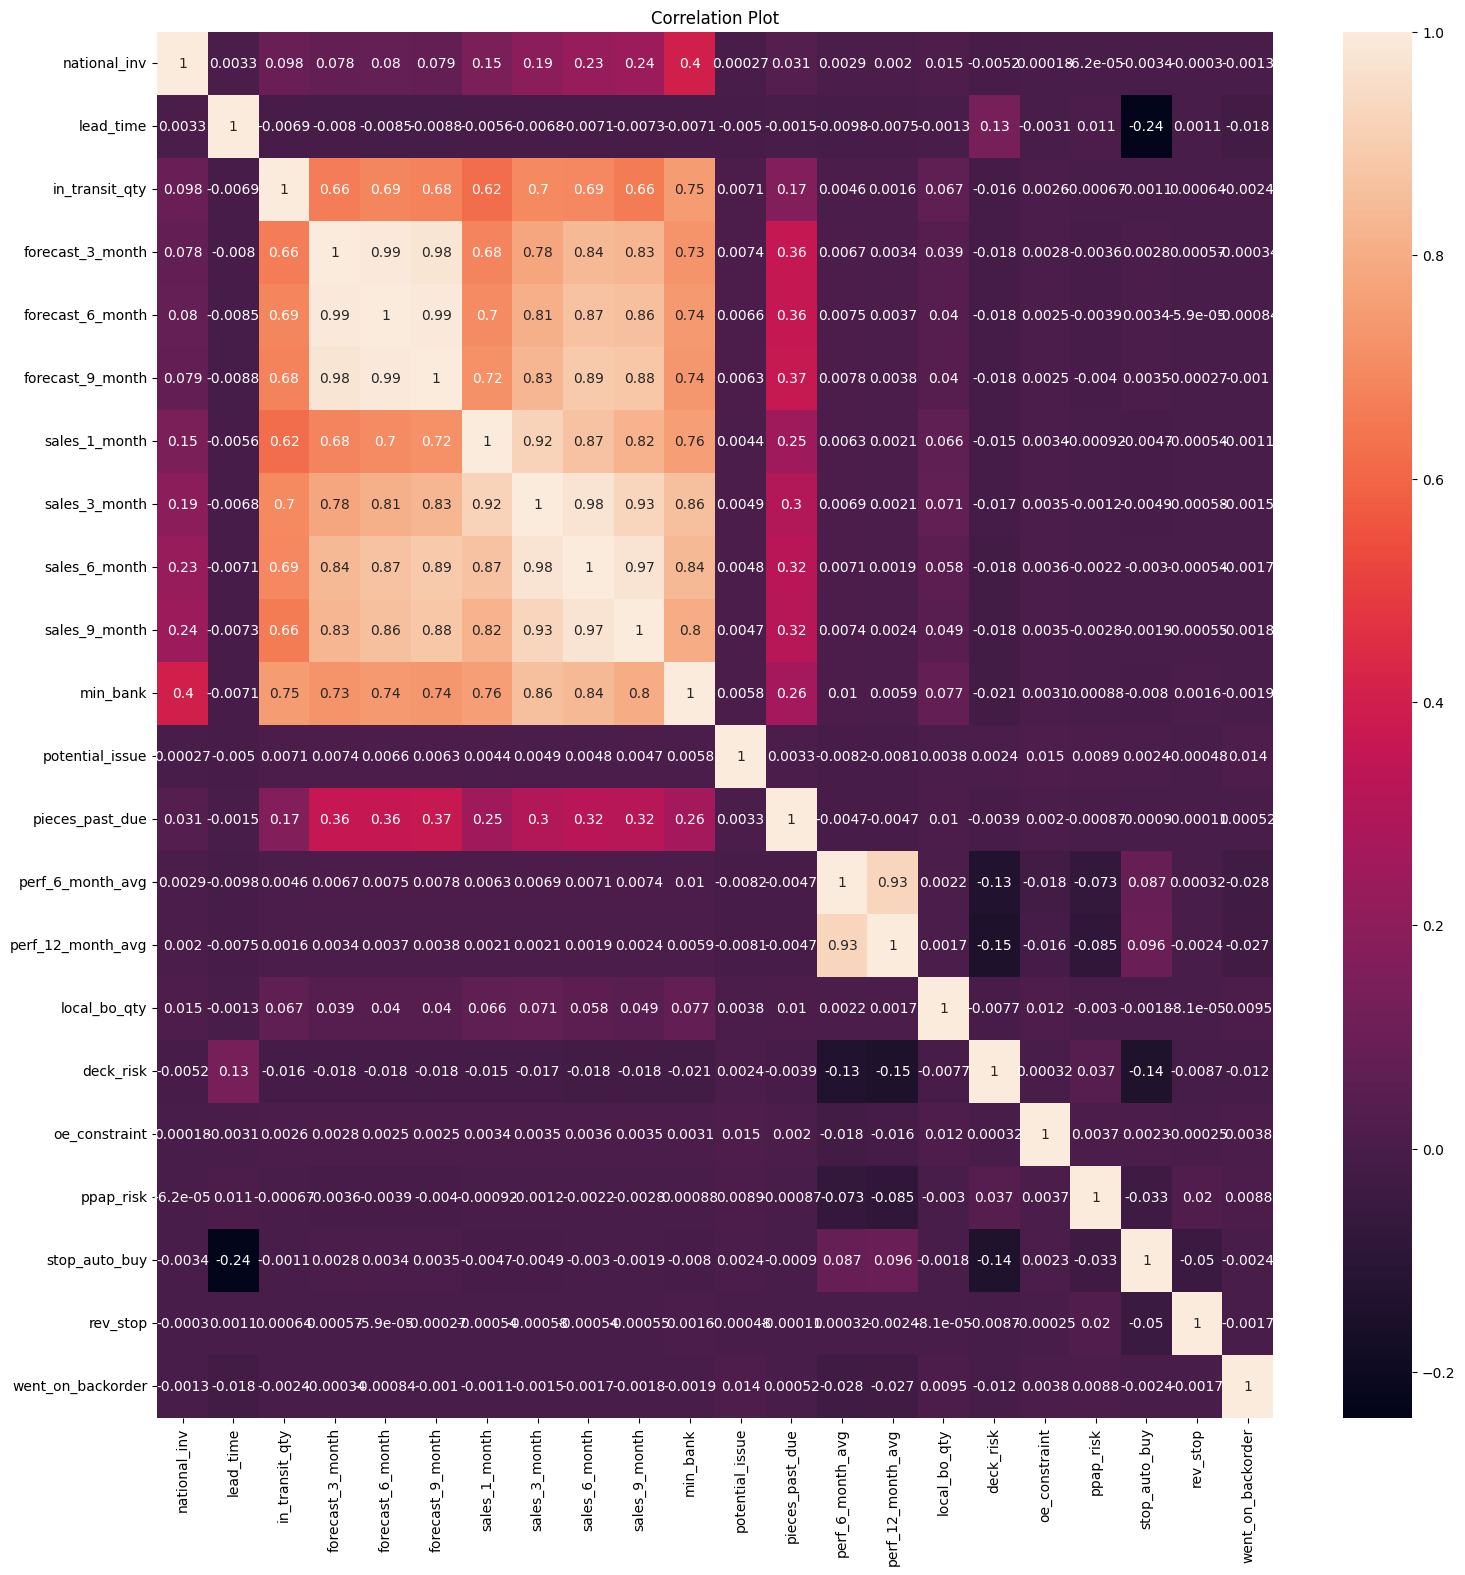

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Combined DataFrame with both X and y
full_trainingset = pd.concat([loaded_X_train, y_train_df], axis=1)
#Correlation matrix
corr_matrix = full_trainingset.corr()
#Create correlation plot
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Plot')
plt.show()

#Features like in_transit_qty, sales_X_month, forecast_X_month, min_bank are highly correlated. This is probably because forecast and demand are correlated in businesses as well. Sales of month x correlates with sales of month y

# **Statistical analysis**

In [ ]:
from tabulate import tabulate

selected_columns = ['min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'national_inv', 'lead_time', 'in_transit_qty', 
                    'forecast_3_month','forecast_6_month','forecast_9_month', 'sales_1_month', 'sales_3_month','sales_6_month', 'sales_9_month']
                     
                    
description = df_train_imputed[selected_columns].describe()
table = tabulate(description, headers='keys', tablefmt='pipe', floatfmt=".2f")
print(table)


|       |   min_bank |   pieces_past_due |   perf_6_month_avg |   perf_12_month_avg |   local_bo_qty |
|:------|-----------:|------------------:|-------------------:|--------------------:|---------------:|
| count | 1687860.00 |        1687860.00 |         1687860.00 |          1687860.00 |     1687860.00 |
| mean  |      52.77 |              2.04 |               0.78 |                0.78 |           0.63 |
| std   |    1254.98 |            236.02 |               0.23 |                0.22 |          33.72 |
| min   |       0.00 |              0.00 |               0.00 |                0.00 |           0.00 |
| 25%   |       0.00 |              0.00 |               0.73 |                0.72 |           0.00 |
| 50%   |       0.00 |              0.00 |               0.82 |                0.81 |           0.00 |
| 75%   |       3.00 |              0.00 |               0.97 |                0.95 |           0.00 |
| max   |  313319.00 |         146496.00 |               1.00 |          

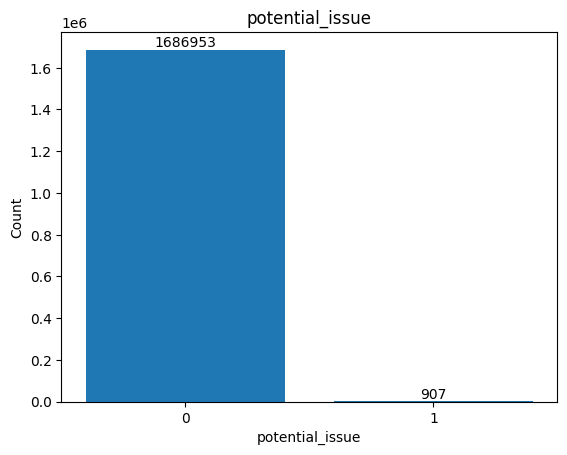

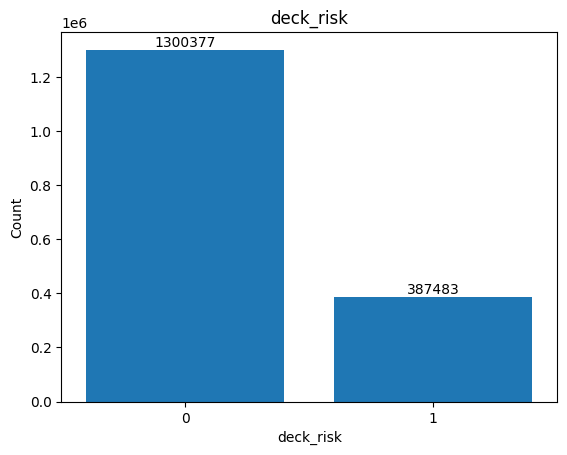

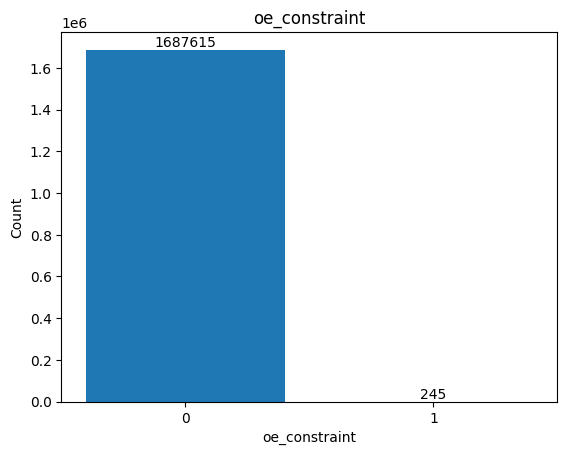

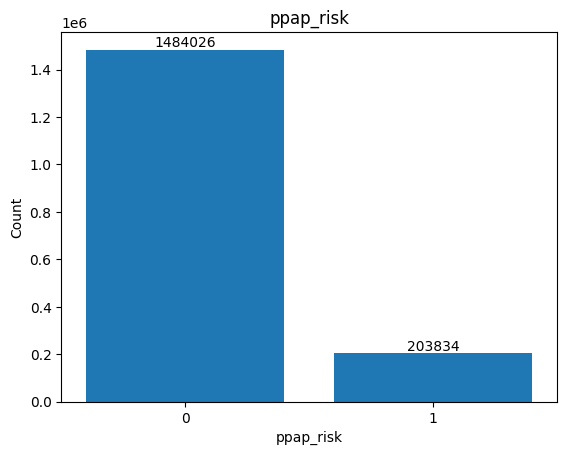

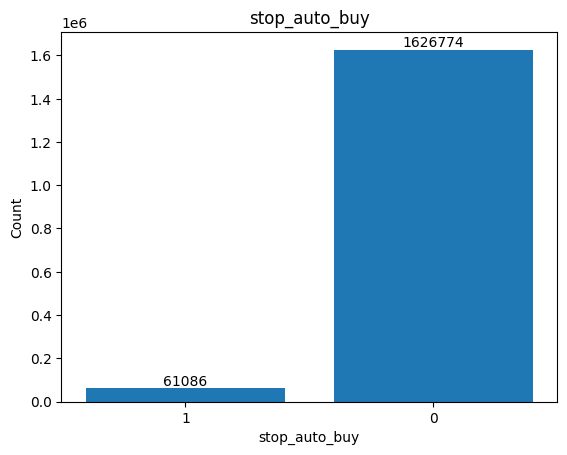

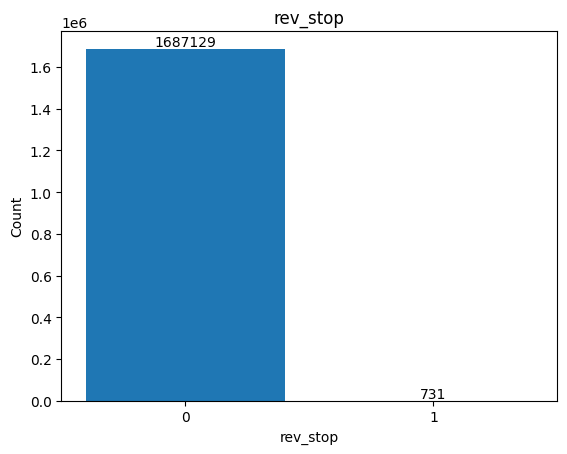

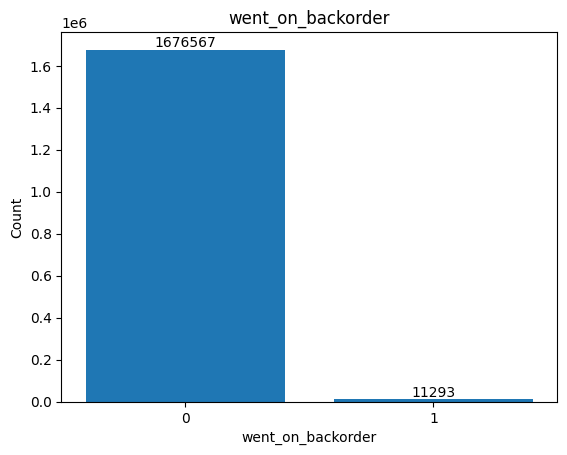

In [ ]:
import matplotlib.pyplot as plt

features = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']

for feature in features:
    value_counts = df_train_imputed[feature].value_counts()
    total_count = value_counts.sum()
    percentages = value_counts / total_count * 100
    
    # Create the bar chart
    plt.figure()
    bars = plt.bar(value_counts.index, value_counts.values)
    
    # Add labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Set the x-axis limits
    plt.xlim([-0.5, 1.5])
    
    # Set the x-axis tick labels
    plt.xticks(value_counts.index, ['0', '1'])
    
    # Set the plot title and labels
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()


# **XGBoost**

## Parameters and Classifier of Baseline model (XGBoost)

In [ ]:
from collections import Counter

# Calculate the count of positive and negative examples
value_counts = Counter(loaded_y_train)

# Define the static XGBoost parameters
params ={
    "objective": "binary:logistic",
    "subsample": .8,
    "colsample_bytree": .8,
    "seed": seed,
    "base_score": 0.5,
    "max_delta_step": 0,
    "n_jobs": -1,
    "gpu_id": 0,
    "tree_method": "gpu_hist"
    #"scale_pos_weight": (value_counts[0] / value_counts[1])
}

print(params)


{'objective': 'binary:logistic', 'subsample': 0.8, 'colsample_bytree': 0.8, 'seed': 35, 'base_score': 0.5, 'max_delta_step': 0, 'n_jobs': -1, 'gpu_id': 0, 'tree_method': 'gpu_hist'}


In [ ]:
# Define the searchable parameters for random search
search_space = {
    "eta": loguniform(0.01, 1),
    "max_depth": randint(5, 9), # sample from integers 1 to 10
    "min_child_weight": randint(1,6), # sample from integers 1 to 10
    "gamma": randint(0, 5),
    "reg_alpha": randint(10, 50),
    "reg_lambda": randint(10, 50),
    "n_estimators": randint(10, 100)
}

In [ ]:
# Create the XGBoost classifier and fit it to the training data
import xgboost as xgb
clf = xgb.XGBClassifier(**params, validate_parameters=True)
clf.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=None, max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, predictor=None,
              random_state=None, ...)>

## XGBoost without sampling strategies

In [ ]:
# Create the HalvingRandomizedSearchCV object
random_search= HalvingRandomSearchCV(clf, search_space, random_state= seed, cv=5, verbose= 4, n_candidates="exhaust", min_resources=1000, scoring= 'roc_auc')
search_obj= random_search.fit(loaded_X_train, loaded_y_train)

Streaminguitvoer ingekort tot de laatste 5000 regels.
[CV 1/5] END eta=0.10861458284021756, gamma=2, max_depth=5, min_child_weight=3, n_estimators=19, reg_alpha=35, reg_lambda=13;, score=(train=0.996, test=0.456) total time=   0.0s
[CV 2/5] END eta=0.10861458284021756, gamma=2, max_depth=5, min_child_weight=3, n_estimators=19, reg_alpha=35, reg_lambda=13;, score=(train=0.990, test=0.803) total time=   0.0s
[CV 3/5] END eta=0.10861458284021756, gamma=2, max_depth=5, min_child_weight=3, n_estimators=19, reg_alpha=35, reg_lambda=13;, score=(train=0.995, test=0.148) total time=   0.0s
[CV 4/5] END eta=0.10861458284021756, gamma=2, max_depth=5, min_child_weight=3, n_estimators=19, reg_alpha=35, reg_lambda=13;, score=(train=0.995, test=0.390) total time=   0.0s
[CV 5/5] END eta=0.10861458284021756, gamma=2, max_depth=5, min_child_weight=3, n_estimators=19, reg_alpha=35, reg_lambda=13;, score=(train=0.993, test=0.952) total time=   0.0s
[CV 1/5] END eta=0.07120808821258766, gamma=2, max_depth

In [ ]:
joblib.dump(search_obj, XGBoost_no_sampling_strategy)
final_baseline = joblib.load(XGBoost_no_sampling_strategy)

In [ ]:
#Access the best parameters after tuning
best_params = final_baseline.best_params_
print(best_params)

# Access the validation set score for the best hyperparameter values
best_val_score = final_baseline.best_score_
print(best_val_score)

{'eta': 0.09570762582018215, 'gamma': 2, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 65, 'reg_alpha': 13, 'reg_lambda': 35}
0.9583288781221256


## XGBoost with RUS

In [4]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(sampling_strategy = "majority", replacement = False, random_state=seed)
X_train_resampled, y_train_resampled= rus.fit_resample(loaded_X_train, loaded_y_train)

In [ ]:
len(y_train_resampled[y_train_resampled== 0]), len(y_train_resampled[y_train_resampled== 1])

(11293, 11293)

In [ ]:
# Create the HalvingRandomizedSearchCV object
random_search_with_rus= HalvingRandomSearchCV(clf, search_space, random_state= seed, cv=5, verbose= 4, n_candidates="exhaust", min_resources=1000, scoring= 'roc_auc')
search_obj_with_rus= random_search_with_rus.fit(X_train_resampled, y_train_resampled)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 1000
max_resources_: 22586
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 22
n_resources: 1000
Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV 1/5] END eta=0.08243466861912178, gamma=4, max_depth=8, min_child_weight=2, n_estimators=73, reg_alpha=10, reg_lambda=21;, score=(train=0.922, test=0.941) total time=   0.1s
[CV 2/5] END eta=0.08243466861912178, gamma=4, max_depth=8, min_child_weight=2, n_estimators=73, reg_alpha=10, reg_lambda=21;, score=(train=0.931, test=0.913) total time=   0.1s
[CV 3/5] END eta=0.08243466861912178, gamma=4, max_depth=8, min_child_weight=2, n_estimators=73, reg_alpha=10, reg_lambda=21;, score=(train=0.919, test=0.896) total time=   0.1s
[CV 4/5] END eta=0.08243466861912178, gamma=4, max_depth=8, min_child_weight=2, n_estimators=73, reg_alpha=10, reg_lambda=21;, score=(train=0.908, test=0.928) total time=   0.1s
[CV 5/5] END eta=0.0824

In [ ]:
joblib.dump(search_obj_with_rus, XGBoost_with_rus)
final_baseline_rus = joblib.load(XGBoost_with_rus)

In [ ]:
#Access the best parameters after tuning
best_params2 = final_baseline_rus.best_params_
print(best_params2)

# Access the validation set score for the best hyperparameter values
best_val_score2 = final_baseline_rus.best_score_
print(best_val_score2)

{'eta': 0.5155881258951603, 'gamma': 0, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 64, 'reg_alpha': 22, 'reg_lambda': 34}
0.9444423819458214


## XGBoost with ROS

In [4]:
from imblearn.over_sampling import RandomOverSampler
# Create an instance of RandomOverSampler
ros = RandomOverSampler(sampling_strategy = "minority", random_state=seed)
X_train_resampled3, y_train_resampled3= ros.fit_resample(loaded_X_train, loaded_y_train)

In [ ]:
len(y_train_resampled3[y_train_resampled3== 0]), len(y_train_resampled3[y_train_resampled3== 1])

(1676567, 1676567)

In [ ]:
# Create the HalvingRandomizedSearchCV object
random_search_with_ros= HalvingRandomSearchCV(clf, search_space, random_state= seed, cv=5, verbose= 4, n_candidates="exhaust", min_resources=1000, scoring= 'roc_auc')
search_obj_with_ros= random_search_with_ros.fit(X_train_resampled3, y_train_resampled3)

Streaminguitvoer ingekort tot de laatste 5000 regels.
[CV 1/5] END eta=0.08928708691738145, gamma=0, max_depth=6, min_child_weight=3, n_estimators=72, reg_alpha=23, reg_lambda=43;, score=(train=0.933, test=0.897) total time=   0.1s
[CV 2/5] END eta=0.08928708691738145, gamma=0, max_depth=6, min_child_weight=3, n_estimators=72, reg_alpha=23, reg_lambda=43;, score=(train=0.937, test=0.928) total time=   0.1s
[CV 3/5] END eta=0.08928708691738145, gamma=0, max_depth=6, min_child_weight=3, n_estimators=72, reg_alpha=23, reg_lambda=43;, score=(train=0.941, test=0.918) total time=   0.1s
[CV 4/5] END eta=0.08928708691738145, gamma=0, max_depth=6, min_child_weight=3, n_estimators=72, reg_alpha=23, reg_lambda=43;, score=(train=0.936, test=0.935) total time=   0.1s
[CV 5/5] END eta=0.08928708691738145, gamma=0, max_depth=6, min_child_weight=3, n_estimators=72, reg_alpha=23, reg_lambda=43;, score=(train=0.935, test=0.935) total time=   0.1s
[CV 1/5] END eta=0.05417586497140273, gamma=4, max_depth

In [ ]:
joblib.dump(search_obj_with_ros, XGBoost_with_ros)
final_baseline_ros = joblib.load(XGBoost_with_ros)

In [ ]:
# Access the best estimator from the HalvingRandomizedSearchCV object
# Calculate the mean ROC AUC score across all folds for the best estimator
mean_val_roc_auc = final_baseline_ros.best_score_
print(mean_val_roc_auc)
#Access the best parameters after tuning
best_params4 = final_baseline_ros.best_params_
print(best_params4)

0.9930746289478494
{'eta': 0.7619802500576526, 'gamma': 0, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 70, 'reg_alpha': 22, 'reg_lambda': 13}


In [ ]:
y_pred_XGBoost_ros = final_baseline_ros.predict(loaded_X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
# Obtain predicted probabilities from your baseline model on the test data
y_pred_proba_baseline3 = final_baseline_ros.predict_proba(loaded_X_test)[:, 1]
auc = roc_auc_score(loaded_y_test, y_pred_proba_baseline3)
print("AUC: {:.4f}".format(auc))
accuracy = accuracy_score(loaded_y_test, y_pred_XGBoost_ros)
print("Accuracy: {:.4f}".format(accuracy))
balanced_accuracy = balanced_accuracy_score(loaded_y_test, y_pred_XGBoost_ros)
print("Balanced Accuracy: {:.4f}".format(balanced_accuracy))
map_score = average_precision_score(loaded_y_test, y_pred_XGBoost_ros)
print("MAP: {:.4f}".format(map_score))
recall = recall_score(loaded_y_test, y_pred_XGBoost_ros)
print("Recall: {:.4f}".format(recall))
precision = precision_score(loaded_y_test, y_pred_XGBoost_ros)
print("Precision: {:.4f}".format(precision))
f1 = f1_score(loaded_y_test, y_pred_XGBoost_ros)
print("F1 Score: {:.4f}".format(f1))
classification = classification_report(loaded_y_test, y_pred_XGBoost_ros)
print("Classification report:", classification)

AUC: 0.8993
Accuracy: 0.9676
Balanced Accuracy: 0.7162
MAP: 0.0802
Recall: 0.4591
Precision: 0.1617
F1 Score: 0.2392
Classification report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98    239387
           1       0.16      0.46      0.24      2688

    accuracy                           0.97    242075
   macro avg       0.58      0.72      0.61    242075
weighted avg       0.98      0.97      0.98    242075



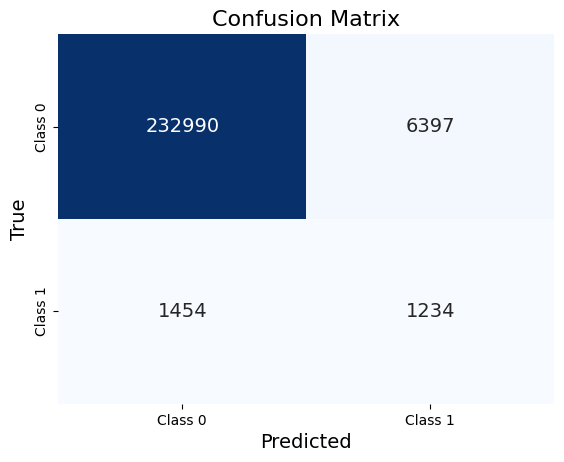

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(loaded_y_test, y_pred_XGBoost_ros)

# Define class labels
class_names = ['Class 0', 'Class 1']  # Replace with your actual class labels

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)

# Set plot labels and title
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()

# **Bidirectional Recurrent Neural Network**

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, stratify = y_train_resampled, random_state=seed)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled3, y_train_resampled3, test_size=0.2, stratify = y_train_resampled3, random_state=seed)

In [8]:
#Most recent code: for RUS
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Activation
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define the hypermodel class
class BRNNHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    
    def build(self, hp):
        model = Sequential()
        
        # Add the first layer with input shape
        model.add(Bidirectional(LSTM(units=hp.Int('lstm_units_0', min_value=64, max_value=256, step=64),
                                     return_sequences=True),
                                input_shape=self.input_shape))
        
        # Add intermediate layers
        for i in range(1, 3):
            model.add(Bidirectional(LSTM(units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32),
                                         return_sequences=True)))
        
        # Add the last layer without return sequences
        model.add(Bidirectional(LSTM(units=hp.Int('lstm_units_3', min_value=8, max_value=32, step=8))))
        
        # Add a dense layer
        model.add(Dense(units=hp.Int('dense_units', min_value=8, max_value=32, step=8), activation='relu'))
        
        # Add the output layer
        model.add(Dense(units=1, activation='sigmoid'))
        
        # Compile the model
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-2, 5e-3]))
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
        
        return model

# Define the input shape
input_shape = (21, 1)

# Define the hypermodel
hypermodel = BRNNHyperModel(input_shape=input_shape)

# Define the tuner
tuner = RandomSearch(
    hypermodel,
    objective=Objective('val_auc', direction='max'),
    max_trials=30
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Retrieve the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Print the model summary
best_model.summary()


Trial 30 Complete [00h 01m 53s]
val_auc: 0.940403938293457

Best val_auc So Far: 0.9430347681045532
Total elapsed time: 00h 56m 01s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 21, 512)          528384    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 21, 192)          467712    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 21, 64)           57600     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 48)               17088     
 nal)                                                   

In [9]:
best_model.save("/content/drive/MyDrive/Thesis_DSS/Models/BRNN/BRNN_with_rus.h5")

In [15]:
from tensorflow.keras.models import load_model
loaded_brnn_rus = load_model("/content/drive/MyDrive/Thesis_DSS/Models/BRNN/BRNN_with_rus.h5")

In [11]:
validation_score = loaded_brnn_rus.evaluate(X_val, y_val)
print("Validation Loss: {:.4f}".format(validation_score[0]))
print("Validation Accuracy: {:.4f}".format(validation_score[1]))
print("Validation AUC: {:.4f}".format(validation_score[2]))

142/142 [==============================] - 4s 7ms/step - loss: 0.3025 - accuracy: 0.8778 - auc: 0.9430
Validation Loss: 0.3025
Validation Accuracy: 0.8778
Validation AUC: 0.9430


In [16]:
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, average_precision_score, recall_score, precision_score, f1_score, classification_report

# Obtain predicted probabilities from the best model on the test data
y_pred_proba_brnn = loaded_brnn_rus.predict(loaded_X_test)

# Calculate AUC
auc = roc_auc_score(loaded_y_test, y_pred_proba_brnn)
print("AUC: {:.4f}".format(auc))

# Convert predicted probabilities to binary predictions
y_pred_brnn = (y_pred_proba_brnn > 0.5).astype(int)

balanced_accuracy = balanced_accuracy_score(loaded_y_test, y_pred_brnn)
print("Balanced Accuracy: {:.4f}".format(balanced_accuracy))

map_score = average_precision_score(loaded_y_test, y_pred_proba_brnn)
print("MAP: {:.4f}".format(map_score))

recall = recall_score(loaded_y_test, y_pred_brnn)
print("Recall: {:.4f}".format(recall))

precision = precision_score(loaded_y_test, y_pred_brnn)
print("Precision: {:.4f}".format(precision))

f1 = f1_score(loaded_y_test, y_pred_brnn)
print("F1 Score: {:.4f}".format(f1))

classification = classification_report(loaded_y_test, y_pred_brnn)
print("Classification report:", classification)


7565/7565 [==============================] - 46s 6ms/step
AUC: 0.9309
Balanced Accuracy: 0.8590
MAP: 0.2272
Recall: 0.8296
Precision: 0.0771
F1 Score: 0.1410
Classification report:               precision    recall  f1-score   support

           0       1.00      0.89      0.94    239387
           1       0.08      0.83      0.14      2688

    accuracy                           0.89    242075
   macro avg       0.54      0.86      0.54    242075
weighted avg       0.99      0.89      0.93    242075



In [13]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters.values)

Best Hyperparameters:
{'lstm_units_0': 256, 'lstm_units_1': 96, 'lstm_units_2': 32, 'lstm_units_3': 24, 'dense_units': 16, 'learning_rate': 0.001}


Epoch 1/10
565/565 [==============================] - 17s 16ms/step - loss: 0.3238 - accuracy: 0.8704 - auc: 0.9345 - val_loss: 0.3253 - val_accuracy: 0.8683 - val_auc: 0.9365
Epoch 2/10
565/565 [==============================] - 9s 16ms/step - loss: 0.3026 - accuracy: 0.8809 - auc: 0.9428 - val_loss: 0.3068 - val_accuracy: 0.8767 - val_auc: 0.9413
Epoch 3/10
565/565 [==============================] - 9s 16ms/step - loss: 0.2962 - accuracy: 0.8805 - auc: 0.9456 - val_loss: 0.3128 - val_accuracy: 0.8707 - val_auc: 0.9404
Epoch 4/10
565/565 [==============================] - 9s 16ms/step - loss: 0.2899 - accuracy: 0.8843 - auc: 0.9478 - val_loss: 0.3047 - val_accuracy: 0.8763 - val_auc: 0.9424
Epoch 5/10
565/565 [==============================] - 9s 16ms/step - loss: 0.2843 - accuracy: 0.8886 - auc: 0.9493 - val_loss: 0.3129 - val_accuracy: 0.8763 - val_auc: 0.9402
Epoch 6/10
565/565 [==============================] - 9s 16ms/step - loss: 0.2828 - accuracy: 0.8874 - auc: 0.9502 - val_los

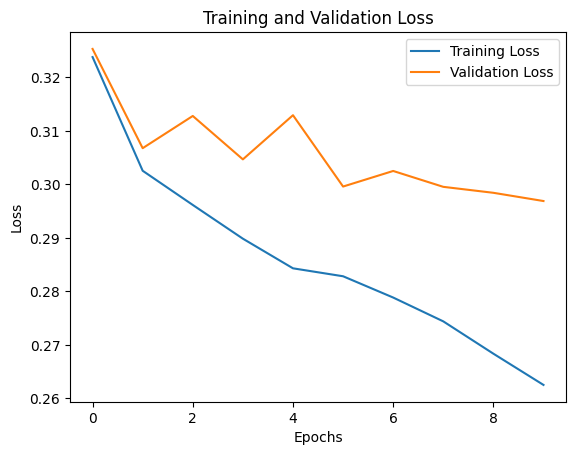

In [18]:
import matplotlib.pyplot as plt

# Fit the best model and capture the training history
history = loaded_brnn_rus.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

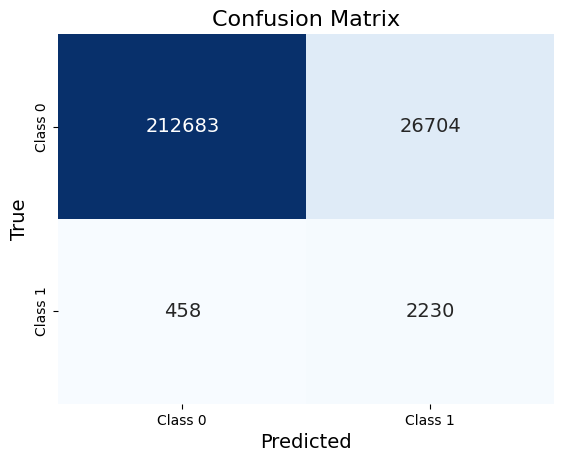

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(loaded_y_test, y_pred_brnn)

# Define class labels
class_names = ['Class 0', 'Class 1']  # Replace with your actual class labels

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)

# Set plot labels and title
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()

In [48]:
# import shap
# import numpy as np
# from sklearn.metrics import r2_score

# # Convert X_train and X_val to NumPy arrays
# X_train_np = X_train.to_numpy()
# X_val_np = X_val.to_numpy()

# # Create the SHAP explainer using the best model
# explainer = shap.Explainer(best_model, X_train_np)

# # Calculate the SHAP values
# shap_values = explainer(X_val_np)

# # Extract the feature names from the DataFrame columns
# feature_names = X_train.columns.tolist()


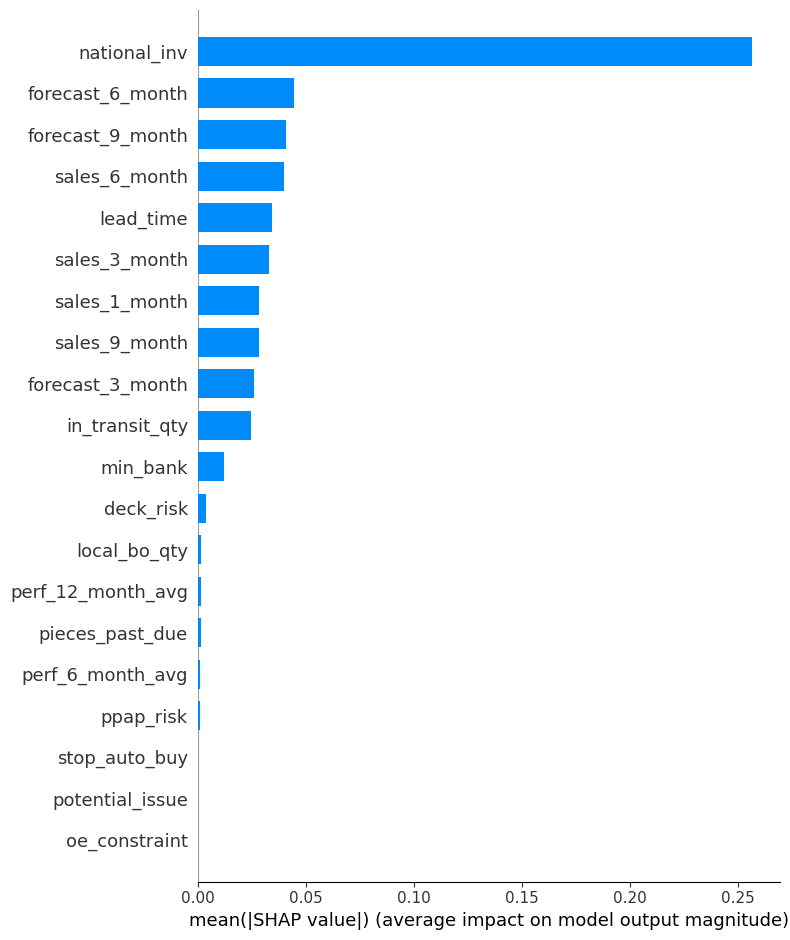

In [35]:
import shap
import matplotlib.pyplot as plt
# Generate the summary plot
shap.summary_plot(shap_values, X_val, feature_names=feature_names, plot_type='bar')

# Show the plot
plt.show()


## BRNN_ROS

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Activation
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define the hypermodel class
class BRNNHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape
    
    def build(self, hp):
        model = Sequential()
        
        # Add the first layer with input shape
        model.add(Bidirectional(LSTM(units=hp.Int('lstm_units_0', min_value=64, max_value=256, step=64),
                                     return_sequences=True),
                                input_shape=self.input_shape))
        
        # Add intermediate layers
        for i in range(1, 3):
            model.add(Bidirectional(LSTM(units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32),
                                         return_sequences=True)))
        
        # Add the last layer without return sequences
        model.add(Bidirectional(LSTM(units=hp.Int('lstm_units_3', min_value=8, max_value=32, step=8))))
        
        # Add a dense layer
        model.add(Dense(units=hp.Int('dense_units', min_value=8, max_value=32, step=8), activation='relu'))
        
        # Add the output layer
        model.add(Dense(units=1, activation='sigmoid'))
        
        # Compile the model
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-2, 5e-3]))
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
        
        return model

# Define the input shape
input_shape = (21, 1)

# Define the hypermodel
hypermodel = BRNNHyperModel(input_shape=input_shape)

# Define the tuner
tuner2 = RandomSearch(
    hypermodel,
    objective=Objective('val_auc', direction='max'),
    max_trials=10
)

# Perform hyperparameter tuning
tuner2.search(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=1024)

# Retrieve the best model from the tuner
best_model2 = tuner2.get_best_models(num_models=1)[0]

# Print the model summary
best_model2.summary()

Trial 10 Complete [00h 04m 15s]
val_auc: 0.9958837628364563

Best val_auc So Far: 0.9960667490959167
Total elapsed time: 00h 42m 09s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 21, 512)          528384    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 21, 192)          467712    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 21, 192)          221952    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 48)               41664     
 nal)                                                  

In [8]:
best_model2.save("/content/drive/MyDrive/Thesis_DSS/Models/BRNN/BRNN_with_ros.h5")

In [9]:
from tensorflow.keras.models import load_model
loaded_brnn_ros = load_model("/content/drive/MyDrive/Thesis_DSS/Models/BRNN/BRNN_with_ros.h5")

In [10]:
validation_score = loaded_brnn_ros.evaluate(X_val, y_val)
print("Validation Loss: {:.4f}".format(validation_score[0]))
print("Validation Accuracy: {:.4f}".format(validation_score[1]))
print("Validation AUC: {:.4f}".format(validation_score[2]))

20958/20958 [==============================] - 145s 7ms/step - loss: 0.0583 - accuracy: 0.9811 - auc: 0.9961
Validation Loss: 0.0583
Validation Accuracy: 0.9811
Validation AUC: 0.9961


In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, average_precision_score, recall_score, precision_score, f1_score, classification_report

# Obtain predicted probabilities from the best model on the test data
y_pred_proba_brnn2 = loaded_brnn_ros.predict(loaded_X_test)

# Calculate AUC
auc = roc_auc_score(loaded_y_test, y_pred_proba_brnn2)
print("AUC: {:.4f}".format(auc))

# Convert predicted probabilities to binary predictions
y_pred_brnn2 = (y_pred_proba_brnn2 > 0.5).astype(int)

balanced_accuracy = balanced_accuracy_score(loaded_y_test, y_pred_brnn2)
print("Balanced Accuracy: {:.4f}".format(balanced_accuracy))

recall = recall_score(loaded_y_test, y_pred_brnn2)
print("Recall: {:.4f}".format(recall))

precision = precision_score(loaded_y_test, y_pred_brnn2)
print("Precision: {:.4f}".format(precision))

f1 = f1_score(loaded_y_test, y_pred_brnn2)
print("F1 Score: {:.4f}".format(f1))

classification = classification_report(loaded_y_test, y_pred_brnn2)
print("Classification report:", classification)

7565/7565 [==============================] - 46s 6ms/step
AUC: 0.8367
Balanced Accuracy: 0.6740
Recall: 0.3709
Precision: 0.1542
F1 Score: 0.2178
Classification report:               precision    recall  f1-score   support

           0       0.99      0.98      0.98    239387
           1       0.15      0.37      0.22      2688

    accuracy                           0.97    242075
   macro avg       0.57      0.67      0.60    242075
weighted avg       0.98      0.97      0.98    242075



In [12]:
best_hyperparameters = tuner2.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters.values)

Best Hyperparameters:
{'lstm_units_0': 256, 'lstm_units_1': 96, 'lstm_units_2': 96, 'lstm_units_3': 24, 'dense_units': 8, 'learning_rate': 0.001}


Epoch 1/5
2620/2620 [==============================] - 61s 20ms/step - loss: 0.0716 - accuracy: 0.9762 - auc: 0.9949 - val_loss: 0.0514 - val_accuracy: 0.9829 - val_auc: 0.9969
Epoch 2/5
2620/2620 [==============================] - 52s 20ms/step - loss: 0.0448 - accuracy: 0.9854 - auc: 0.9976 - val_loss: 0.0424 - val_accuracy: 0.9863 - val_auc: 0.9977
Epoch 3/5
2620/2620 [==============================] - 52s 20ms/step - loss: 0.0392 - accuracy: 0.9870 - auc: 0.9981 - val_loss: 0.0416 - val_accuracy: 0.9866 - val_auc: 0.9978
Epoch 4/5
2620/2620 [==============================] - 52s 20ms/step - loss: 0.0358 - accuracy: 0.9879 - auc: 0.9985 - val_loss: 0.0373 - val_accuracy: 0.9878 - val_auc: 0.9980
Epoch 5/5
2620/2620 [==============================] - 52s 20ms/step - loss: 0.0327 - accuracy: 0.9888 - auc: 0.9987 - val_loss: 0.0379 - val_accuracy: 0.9880 - val_auc: 0.9980


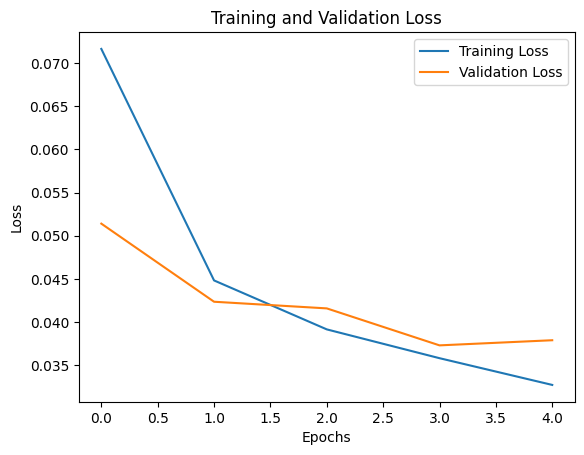

In [13]:
import matplotlib.pyplot as plt
# Fit the best model and capture the training history
history = loaded_brnn_ros.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=1024)
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

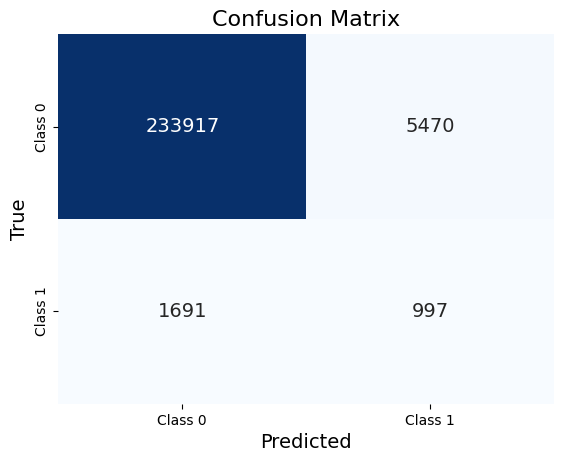

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(loaded_y_test, y_pred_brnn2)

# Define class labels
class_names = ['Class 0', 'Class 1']  # Replace with your actual class labels

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)

# Set plot labels and title
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()

# **Siamese Recurrent Neural Network**

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2682507, 21), (2682507,), (670627, 21), (670627,))

In [ ]:
from itertools import combinations, product

def create_pairs(X, y):
    pairs = []
    y_pairs = []

    pos_indices = np.where(y == 1)[0]
    neg_indices = np.where(y == 0)[0]

    # Positive pairs
    for pair in combinations(pos_indices, 2):
        pairs.append(pair)
        y_pairs.append(1)

    # Negative pairs
    for pair in product(neg_indices, pos_indices):
        pairs.append(pair)
        y_pairs.append(0)

    pairs = np.array(pairs)
    y_pairs = np.array(y_pairs)

    y_pairs = np.reshape(y_pairs, (len(pairs),))

    return pairs, y_pairs


In [ ]:
#X_train_pairs, y_train_pairs = create_pairs(X_train, y_train)

In [ ]:
# Save the variables using joblib
#joblib.dump((X_train_pairs, y_train_pairs), X_Y_train_pairs)
# Load the variables from the saved file
X_train_pairs, y_train_pairs = joblib.load(X_Y_train_pairs)

In [ ]:
X_train_pairs.shape, y_train_pairs.shape

((122415217, 2), (122415217,))

In [ ]:
#X_val_pairs, y_val_pairs = create_pairs(X_val, y_val)

In [ ]:
# Save the variables using joblib
#joblib.dump((X_val_pairs, y_val_pairs), X_Y_val_pairs)
# Load the variables from the saved file
X_val_pairs, y_val_pairs = joblib.load(X_Y_val_pairs)

In [ ]:
X_val_pairs.shape, y_val_pairs.shape

((7653492, 2), (7653492,))

In [ ]:
#We only want positive class of train only.
#this is also our anchor; a positive BO instance
import numpy as np
def test_pairs (x_train, x_test, y_train):
  num_test = x_test.shape[0]
  num_train = x_train.shape[0]
  y_train_indices =np.where(y_train== 1)[0] 
  positive_instances=x_train.iloc[y_train_indices]  #Returns all instances from X_train where y_train == 1
  test_instances = []
  anchor_instances = [] 
  anchors_indices = np.random.choice(positive_instances.shape[0], size = num_test, replace = True)
  for i in range (num_test):
    anchor_index = anchors_indices[i]
    anchor= x_train.iloc[anchor_index]
    test_instance = x_test.iloc[i]
    anchor_instances.append(anchor)
    test_instances.append(test_instance)
  return anchor_instances, test_instances

  #242075 pairs 
  #anchor is X_train; 242075 bo from xtrain

In [ ]:
X_train_instance, X_test_instance = test_pairs(X_train, loaded_X_test, y_train)

In [ ]:
X_train_instance = np.array(X_train_instance)
X_test_instance  = np.array(X_test_instance)

In [5]:
# Save the variables using joblib
#joblib.dump((X_train_instance, X_test_instance), "/content/drive/MyDrive/Thesis_DSS/Models/SRNN/input/test_pairs.pickle")
# Load the variables from the saved file
X_train_instance, X_test_instance = joblib.load("/content/drive/MyDrive/Thesis_DSS/Models/SRNN/input/test_pairs.pickle")

In [ ]:
# View the shape of the loaded data
print("X_train_instance shape:", np.shape(X_train_instance))
print("X_test_instance shape:", np.shape(X_test_instance))

X_train_instance shape: (242075, 21)
X_test_instance shape: (242075, 21)


In [ ]:
y_train_positive_indices = np.nonzero(y_train_pairs ==1)[0]
y_train_negative_indices = np.nonzero(y_train_pairs ==0)[0]
random_y_positives = np.random.choice(y_train_positive_indices, size = 10000000, replace =False) #Balanced class 5000000 pos+neg
random_y_negatives = np.random.choice(y_train_negative_indices, size = 10000000, replace =False)
random_y_pos_neg = np.concatenate((random_y_positives,random_y_negatives ))
np.random.shuffle(random_y_pos_neg)

In [ ]:
y_val_positive_indices = np.nonzero(y_val_pairs ==1)[0]
y_val_negative_indices = np.nonzero(y_val_pairs ==0)[0]
random_y_positives2 = np.random.choice(y_val_positive_indices, size = 2000000, replace =False) #Balanced class 5000000 pos+neg
random_y_negatives2 = np.random.choice(y_val_negative_indices, size = 2000000, replace =False)
random_y_pos_neg2 = np.concatenate((random_y_positives2,random_y_negatives2 ))
np.random.shuffle(random_y_pos_neg2)

In [ ]:
y_selected_pairs = y_train_pairs[random_y_pos_neg]

In [ ]:
y_selected_pairs2 = y_val_pairs[random_y_pos_neg2]

In [ ]:
selected_pairs = X_train_pairs[random_y_pos_neg].squeeze()

In [ ]:
selected_pairs2 = X_val_pairs[random_y_pos_neg2].squeeze()

In [ ]:
input1 = np.array(X_train.iloc[selected_pairs[:,0]])
input1.shape

(20000000, 21)

In [ ]:
input1_val = np.array(X_val.iloc[selected_pairs2[:,0]])
input1_val.shape

(4000000, 21)

In [ ]:
input1 #segmented dataframe. Use selected pairs within the X train dataframe

array([[0.000e+00, 8.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.000e+00, 9.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [4.000e+00, 2.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.158e+03, 2.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 2.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [ ]:
input2 = np.array(X_train.iloc[selected_pairs[:,1]])
input2.shape

(20000000, 21)

In [ ]:
input2_val = np.array(X_val.iloc[selected_pairs2[:,1]])
input2_val.shape

(4000000, 21)

In [ ]:
# Calculate the percentage of similar and dissimilar pairs
similar_percentage = np.sum(y_selected_pairs == 1) / len(y_selected_pairs) * 100
dissimilar_percentage = np.sum(y_selected_pairs == 0) / len(y_selected_pairs) * 100

print("Percentage of Similar Pairs: {:.2f}%".format(similar_percentage))
print("Percentage of Dissimilar Pairs: {:.2f}%".format(dissimilar_percentage))

Percentage of Similar Pairs: 50.00%
Percentage of Dissimilar Pairs: 50.00%


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Define the inputs
input_1 = Input(shape=(21, 1))
input_2 = Input(shape=(21, 1))

# Shared BiLSTM layer
shared_bilstm_layer = Bidirectional(LSTM(128, return_sequences=True))

# Branch 1
encoded_11_output = shared_bilstm_layer(input_1)
encoded_12_output = shared_bilstm_layer(input_2)

# Additional layer
shared_bilstm_layer = Bidirectional(LSTM(64, return_sequences=True))

# Branch 2
encoded_21_output = shared_bilstm_layer(encoded_11_output)
encoded_22_output = shared_bilstm_layer(encoded_12_output)

# Additional layer
shared_bilstm_layer2 = Bidirectional(LSTM(32))

# Branch 3
encoded_31_output = shared_bilstm_layer2(encoded_21_output)
encoded_32_output = shared_bilstm_layer2(encoded_22_output)

# Concatenate the outputs
concatenated = Concatenate()([encoded_31_output, encoded_32_output])

# Dropout layers
dropout_1 = Dropout(0.4)(concatenated)
dropout_2 = Dropout(0.4)(dropout_1)

# Dense layers
dense_1 = Dense(16, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(dropout_2)
dense_2 = Dense(1, activation='sigmoid')(dense_1)

# Create the siamese model
model = Model(inputs=[input_1, input_2], outputs=dense_2)

# Compile the model with the learning rate set to 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

# Print the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 21, 1)]      0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 21, 1)]      0           []                               
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 21, 256)     133120      ['input_3[0][0]',                
 )                                                                'input_4[0][0]']                
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 21, 128)     164352      ['bidirectional_3[0][0]',  

In [ ]:
history = model.fit(
    x=[input1, input2],
    y=y_selected_pairs,
    validation_data=([input1_val, input2_val], y_selected_pairs2),
    epochs=20,
    batch_size=2048,
    callbacks=[es]
)


Epoch 1/20
9766/9766 [==============================] - 1154s 116ms/step - loss: 0.1003 - accuracy: 0.9635 - auc_1: 0.9940 - val_loss: 0.7016 - val_accuracy: 0.8851 - val_auc_1: 0.9197
Epoch 2/20
9766/9766 [==============================] - 1127s 115ms/step - loss: 0.0230 - accuracy: 0.9911 - auc_1: 0.9995 - val_loss: 0.6160 - val_accuracy: 0.8873 - val_auc_1: 0.9252
Epoch 3/20
9766/9766 [==============================] - 1128s 116ms/step - loss: 0.0177 - accuracy: 0.9927 - auc_1: 0.9997 - val_loss: 0.7926 - val_accuracy: 0.8878 - val_auc_1: 0.9149
Epoch 4/20
9766/9766 [==============================] - 1128s 115ms/step - loss: 0.0154 - accuracy: 0.9934 - auc_1: 0.9997 - val_loss: 0.7635 - val_accuracy: 0.8847 - val_auc_1: 0.9147
Epoch 5/20
9766/9766 [==============================] - 1127s 115ms/step - loss: 0.0139 - accuracy: 0.9939 - auc_1: 0.9998 - val_loss: 0.8865 - val_accuracy: 0.8941 - val_auc_1: 0.9136


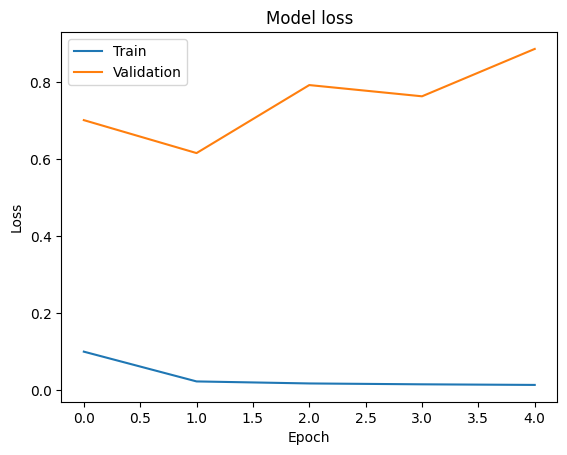

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
model.save("/content/drive/MyDrive/Thesis_DSS/Models/SRNN/srnn_rus.h5")

In [6]:
from tensorflow.keras.models import load_model
loaded_srnn_rus = load_model("/content/drive/MyDrive/Thesis_DSS/Models/SRNN/srnn_rus.h5")

In [7]:
y_pred_srnn= loaded_srnn_rus.predict([X_train_instance, X_test_instance])

7565/7565 [==============================] - 58s 7ms/step


In [8]:
y_pred_labels = (y_pred_srnn > 0.5).astype(int)

In [9]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
# Obtain predicted probabilities from your baseline model on the test data
auc = roc_auc_score(loaded_y_test, y_pred_srnn)
print("AUC: {:.4f}".format(auc))
accuracy = accuracy_score(loaded_y_test, y_pred_labels)
print("Accuracy: {:.4f}".format(accuracy))
balanced_accuracy = balanced_accuracy_score(loaded_y_test, y_pred_labels)
print("Balanced Accuracy: {:.4f}".format(balanced_accuracy))
map_score = average_precision_score(loaded_y_test, y_pred_labels)
print("MAP: {:.4f}".format(map_score))
recall = recall_score(loaded_y_test, y_pred_labels)
print("Recall: {:.4f}".format(recall))
precision = precision_score(loaded_y_test, y_pred_labels)
print("Precision: {:.4f}".format(precision))
f1 = f1_score(loaded_y_test, y_pred_labels)
print("F1 Score: {:.4f}".format(f1))
classification = classification_report(loaded_y_test, y_pred_labels)
print("Classification report:", classification)

AUC: 0.5508
Accuracy: 0.5009
Balanced Accuracy: 0.5051
MAP: 0.0112
Recall: 0.5093
Precision: 0.0113
F1 Score: 0.0222
Classification report:               precision    recall  f1-score   support

           0       0.99      0.50      0.66    239387
           1       0.01      0.51      0.02      2688

    accuracy                           0.50    242075
   macro avg       0.50      0.51      0.34    242075
weighted avg       0.98      0.50      0.66    242075



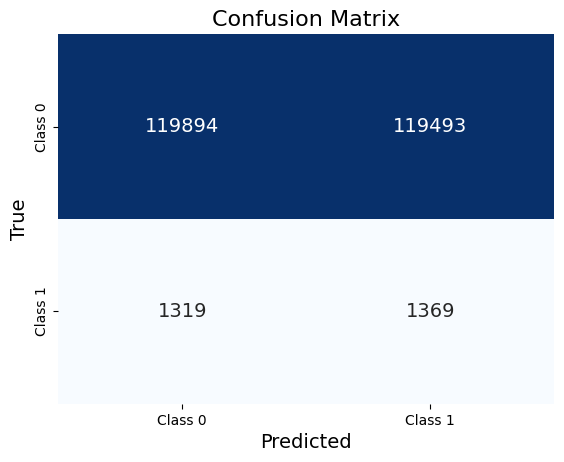

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(loaded_y_test, y_pred_labels)

# Define class labels
class_names = ['Class 0', 'Class 1']  # Replace with your actual class labels

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"size": 14}, xticklabels=class_names, yticklabels=class_names)

# Set plot labels and title
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Show plot
plt.show()